<h1>Topic- Where is Rush?-Train crowd Visualization and Prediction</h1>

<h2>Import library</h2>

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


<h2>Data Reading</h2>

In [2]:
dataset=pd.read_csv("indian_railway_passenger_flow_2024_full.csv")
dataset.head()

,Record_ID,Station_ID,Station_Name,Station_Code,City,Date,Day_Type,Time_Slot,Passenger_Flow,Weather,Special_Event,Platform_No,Train_ID,Ticket_Type,Age_Group,Avg_Wait_Time,Security_Check_Time,Entry_Gate,Exit_Gate,Density_Level
0,1,1,Howrah Junction,HWH,Kolkata,01-01-2024,Weekday,06:00–09:00 AM,15598,Sunny,Yes,18,T406,Pass,Child,4,7,Gate A,Gate B,Low
1,2,1,Howrah Junction,HWH,Kolkata,01-01-2024,Weekday,09:00–12:00 PM,24362,Sunny,Yes,12,T806,Tourist,Child,34,11,Gate B,Gate C,Medium
2,3,1,Howrah Junction,HWH,Kolkata,01-01-2024,Weekday,12:00–03:00 PM,6988,Sunny,No,15,T378,Pass,Child,2,7,Gate B,Gate A,Medium
3,4,1,Howrah Junction,HWH,Kolkata,01-01-2024,Weekday,03:00–06:00 PM,8780,Rainy,No,4,T672,Tourist,Senior,28,3,Gate C,Gate A,Very High
4,5,1,Howrah Junction,HWH,Kolkata,01-01-2024,Weekday,06:00–09:00 PM,28420,Foggy,No,1,T856,Single Journey,Child,26,9,Gate A,Gate A,High


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21960 entries, 0 to 21959
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Record_ID            21960 non-null  int64 
 1   Station_ID           21960 non-null  int64 
 2   Station_Name         21960 non-null  object
 3   Station_Code         21960 non-null  object
 4   City                 21960 non-null  object
 5   Date                 21960 non-null  object
 6   Day_Type             21960 non-null  object
 7   Time_Slot            21960 non-null  object
 8   Passenger_Flow       21960 non-null  int64 
 9   Weather              21960 non-null  object
 10  Special_Event        21960 non-null  object
 11  Platform_No          21960 non-null  int64 
 12  Train_ID             21960 non-null  object
 13  Ticket_Type          21960 non-null  object
 14  Age_Group            21960 non-null  object
 15  Avg_Wait_Time        21960 non-null  int64 
 16  Secu

In [4]:
dataset.describe()

,Record_ID,Station_ID,Passenger_Flow,Platform_No,Avg_Wait_Time,Security_Check_Time
count,21960.000000,21960.000000,21960.000000,21960.000000,21960.000000,21960.000000
mean,10980.500000,5.500000,9882.654508,10.483607,20.971539,7.986612
std,6339.450292,2.872347,6239.974651,5.791991,11.253107,4.316659
min,1.000000,1.000000,2001.000000,1.000000,2.000000,1.000000
25%,5490.750000,3.000000,5492.750000,5.000000,11.000000,4.000000
50%,10980.500000,5.500000,7898.500000,10.000000,21.000000,8.000000
75%,16470.250000,8.000000,12944.250000,15.250000,31.000000,12.000000
max,21960.000000,10.000000,29993.000000,20.000000,40.000000,15.000000


<h2>data Preprocessing</h2>

In [5]:
dataset['City'].unique()

array(['Kolkata', 'New Delhi', 'Mumbai', 'Kanpur', 'Patna', 'Chennai',
       'Vijayawada', 'Ahmedabad', 'Bengaluru'], dtype=object)

In [6]:
dataset['Time_Slot'].unique()

array(['06:00–09:00 AM', '09:00–12:00 PM', '12:00–03:00 PM',
       '03:00–06:00 PM', '06:00–09:00 PM', '09:00–12:00 AM'], dtype=object)

In [7]:
dataset['Weather'].unique()

array(['Sunny', 'Rainy', 'Foggy', 'Cloudy'], dtype=object)

<h2>Data visualization</h2>

<h3>Passenger flow by station</h3>

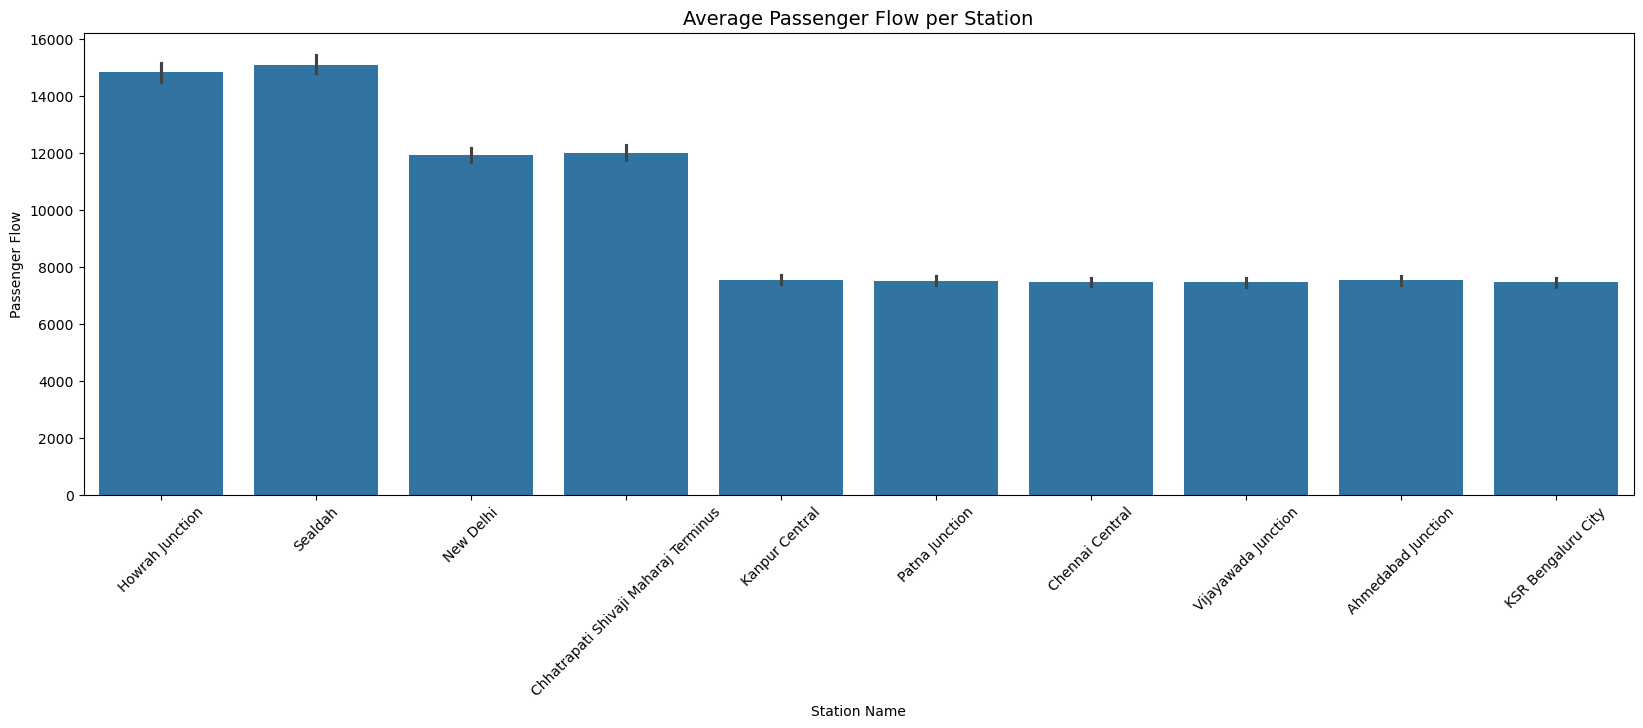

In [8]:
plt.figure(figsize=(20,6))
sns.barplot(x='Station_Name',y='Passenger_Flow',data=dataset)
plt.xticks(rotation=45)
plt.title("Average Passenger Flow per Station", fontsize=14)
plt.ylabel("Passenger Flow")
plt.xlabel("Station Name")
plt.show()


<h4> Most bussiest station is Sealdah and Howrah Junction</h4>
<h4>Kanpur central ,Patna,Chennai,vijaywada junction ,Ahemdabad,KSR Benguluru are less busy station</h4>

<h3>Effect of weather on paseenger flow on particular station</h3>

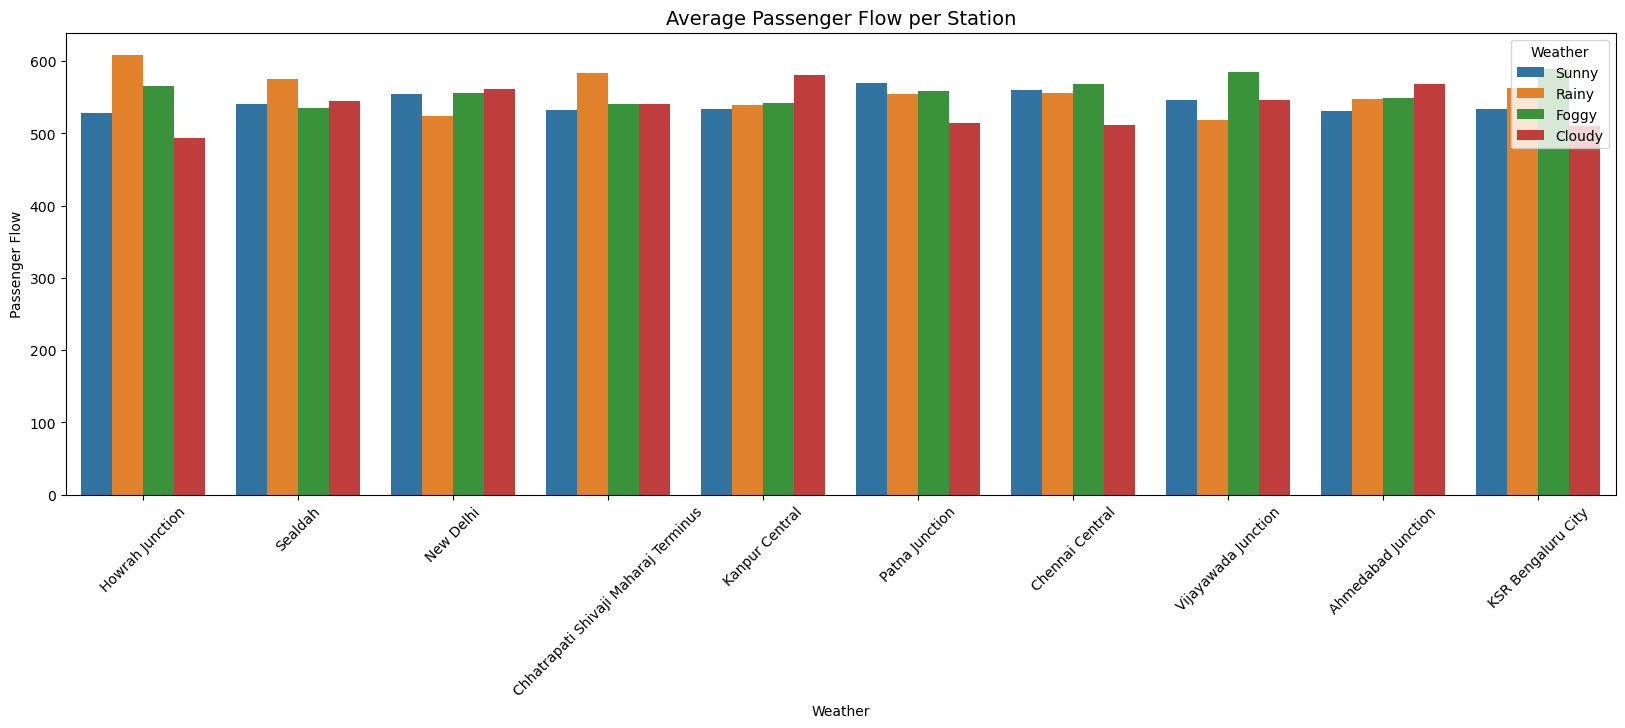

In [9]:
plt.figure(figsize=(20,6))
sns.countplot(x='Station_Name',hue='Weather',data=dataset)
plt.xticks(rotation=45)
plt.title("Average Passenger Flow per Station", fontsize=14)
plt.ylabel("Passenger Flow")
plt.xlabel("Weather")
plt.show()


<h4> There is no such huge diffrence in crowd on the basis of weather ,people are traveliing in every season</h4>
<h4>But in cloudy season there are less croud compare to other seasons</h4>



<h3>Travelling by Age Group</h3>

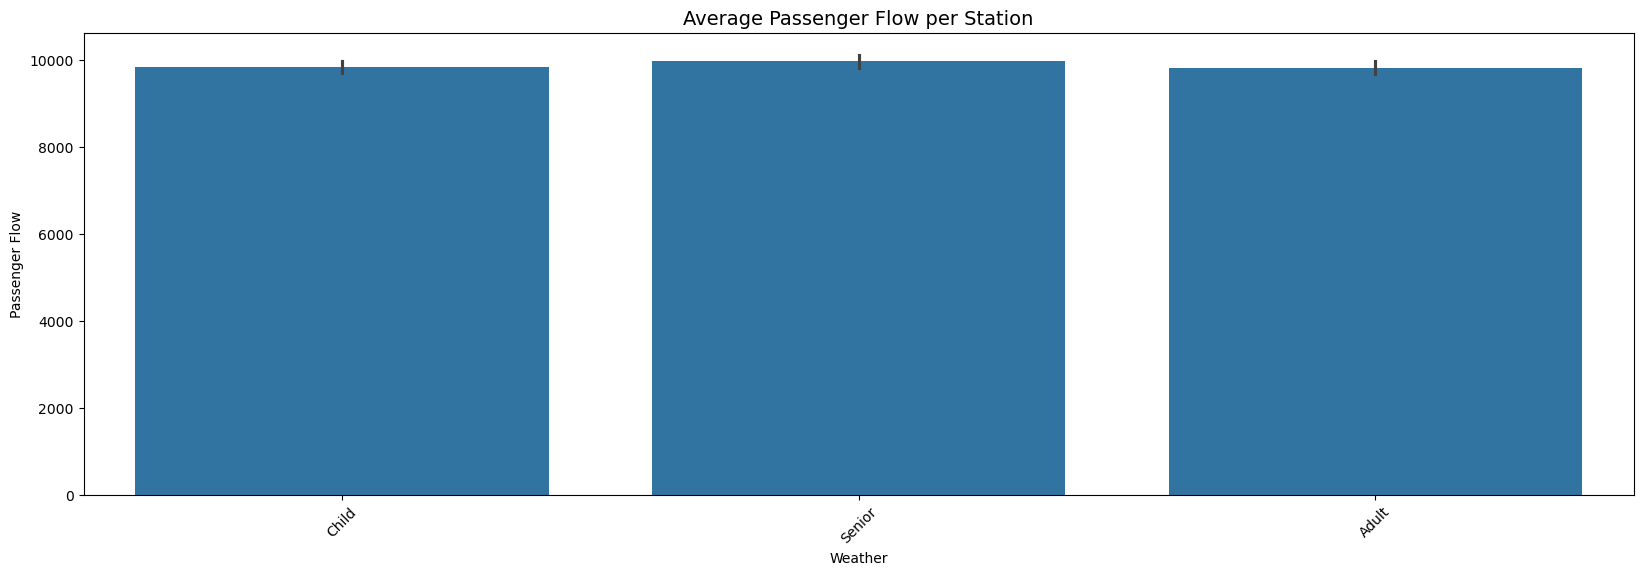

In [10]:
plt.figure(figsize=(20,6))
sns.barplot(x='Age_Group',y='Passenger_Flow',data=dataset)
plt.xticks(rotation=45)
plt.title("Average Passenger Flow per Station", fontsize=14)
plt.ylabel("Passenger Flow")
plt.xlabel("Weather")
plt.show()

<h4>All age group people are excited for travelling ,its not depend on age</h4>

<h3> Passenger flow by Time slot</h3>

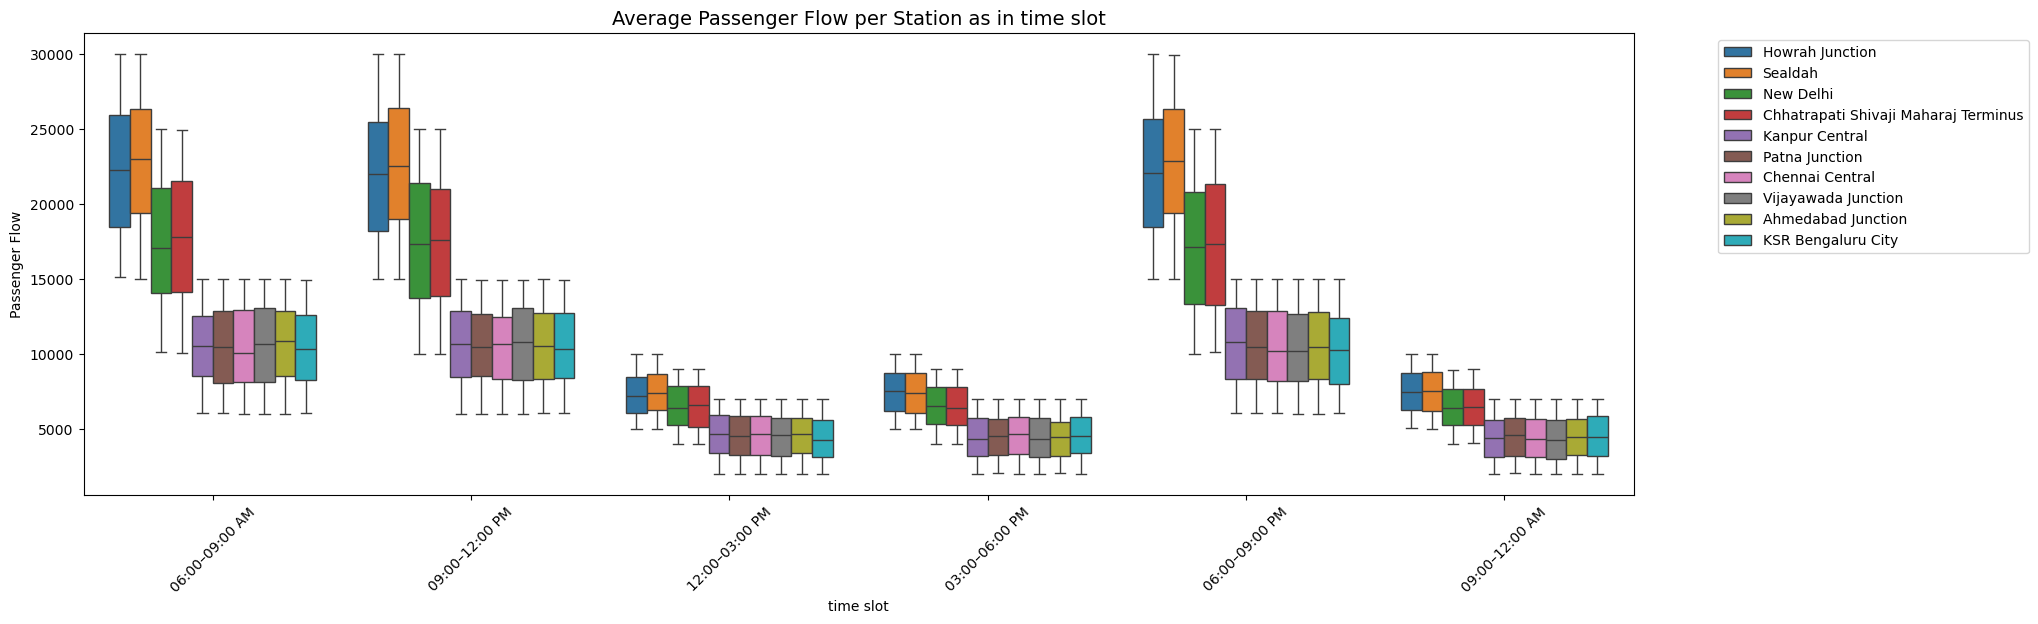

In [12]:
plt.figure(figsize=(20,6))
sns.boxplot(x='Time_Slot',y='Passenger_Flow', hue ="Station_Name",data=dataset)
plt.xticks(rotation=45)
plt.title("Average Passenger Flow per Station as in time slot", fontsize=14)
plt.ylabel("Passenger Flow")
plt.xlabel("time slot")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

<h4> The busiest times are 06:00–09:00 AM and 06:00–09:00 PM (office and work travel).</h4>
<h4>Stations like Howrah, Sealdah, New Delhi, and CSMT (Mumbai) face very high rush in both morning and evening.</h4>
<h4>Between 11:00 AM–3:00 PM, passenger flow is much lower</h4>
<h4>Howrah & Sealdah: Always busy because of suburban and long-distance trains.</h4>
<h4>New Delhi & CSMT: Very crowded during peak hours, but relatively calm in the afternoon.</h4>
<h4>Smaller stations (Vijayawada, Ahmedabad, Bengaluru): The gap between peak and off-peak hours is very clear.</h4>

<h3>Density Level Distribution</h3>

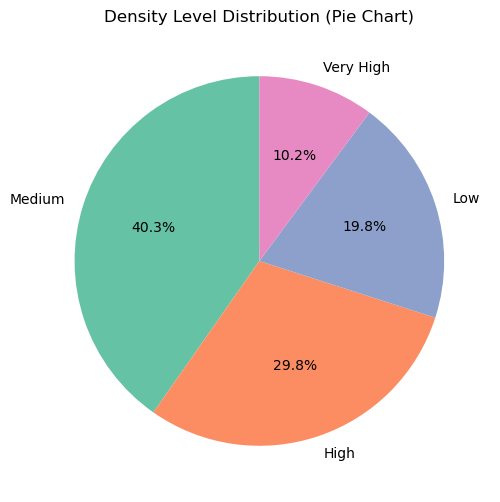

In [15]:
plt.figure(figsize=(6,6))
density_counts = dataset['Density_Level'].value_counts()
plt.pie(density_counts, labels=density_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set2"))
plt.title("Density Level Distribution (Pie Chart)")
plt.show()


<h4> This chart shows how much % time are density is low ,medium ,high, very high</h4>
<h4> approx 30% time of the day the station is high density</h4>
<h4>Very High also takes a significant share (especially large junctions like Howrah, Sealdah, NDLS)</h4>
<h4>Medium density occurs fairly often (smaller/mid-size stations)</h4>
<h4>Low density is rare (mostly off-peak hours or late night)</h4>

<h3>Wait Time vs Security Check Time</h3>

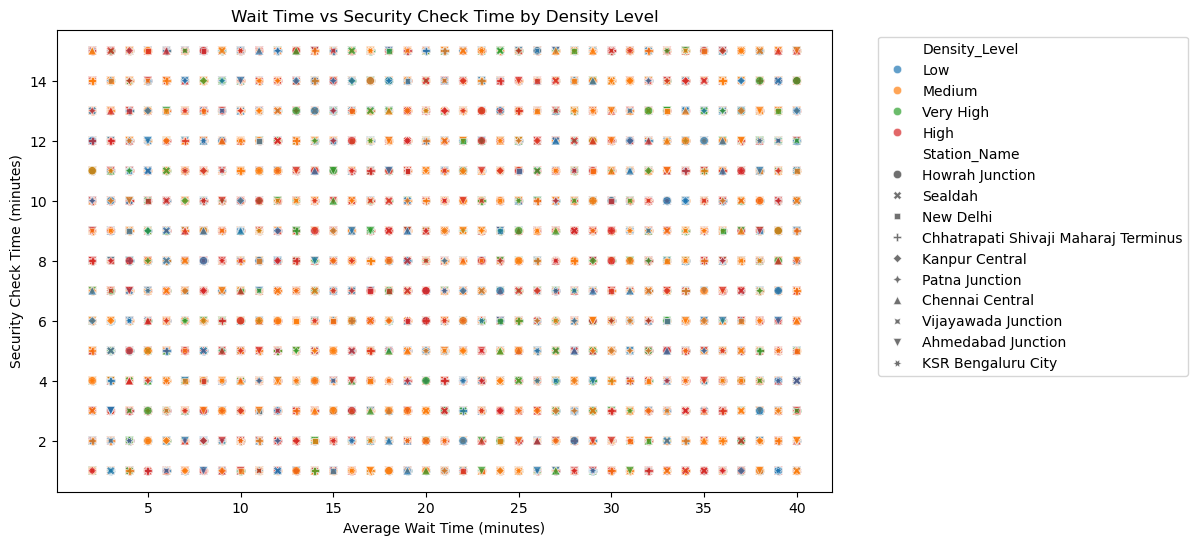

In [20]:
plt.figure(figsize=(10,6))
sns.scatterplot(x="Avg_Wait_Time", 
                y="Security_Check_Time", 
                hue="Density_Level", 
                style="Station_Name", 
                data=dataset, 
                alpha=0.7)

plt.title("Wait Time vs Security Check Time by Density Level")
plt.xlabel("Average Wait Time (minutes)")
plt.ylabel("Security Check Time (minutes)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

<h4>Stations like Howrah, Sealdah, New Delhi show more points in the upper-right → meaning passengers wait longer and also face longer security checks.</h4>
<h4>Smaller stations (Ahmedabad, Vijayawada, Bengaluru): Mostly in the lower-left → shorter wait times and faster security clearance.</h4>
<h4>Direct relation: As Avg_Wait_Time increases, Security_Check_Time also tends to rise (especially in high-density junctions).</h4>
<h4>Operational insight: Major stations should add more security gates or streamline entry checks to reduce crowding during peak hours.</h4>

In [23]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21960 entries, 0 to 21959
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Record_ID            21960 non-null  int64 
 1   Station_ID           21960 non-null  int64 
 2   Station_Name         21960 non-null  object
 3   Station_Code         21960 non-null  object
 4   City                 21960 non-null  object
 5   Date                 21960 non-null  object
 6   Day_Type             21960 non-null  object
 7   Time_Slot            21960 non-null  object
 8   Passenger_Flow       21960 non-null  int64 
 9   Weather              21960 non-null  object
 10  Special_Event        21960 non-null  object
 11  Platform_No          21960 non-null  int64 
 12  Train_ID             21960 non-null  object
 13  Ticket_Type          21960 non-null  object
 14  Age_Group            21960 non-null  object
 15  Avg_Wait_Time        21960 non-null  int64 
 16  Secu

In [28]:
from sklearn.preprocessing import LabelEncoder

In [40]:
# convert all object  data into numerical data by label encoding
le= LabelEncoder()
dataset['Station_Name'] = le.fit_transform(dataset['Station_Name'])
dataset['Station_Code'] = le.fit_transform(dataset['Station_Code'])
dataset['City'] = le.fit_transform(dataset['City'])
dataset['Date'] = le.fit_transform(dataset['Date'])
dataset['Day_Type'] = le.fit_transform(dataset['Day_Type'])
dataset['Time_Slot'] = le.fit_transform(dataset['Time_Slot'])
dataset['Weather'] = le.fit_transform(dataset['Weather'])
dataset['Ticket_Type'] = le.fit_transform(dataset['Ticket_Type'])
dataset['Age_Group'] = le.fit_transform(dataset['Age_Group'])
dataset['Train_ID'] = le.fit_transform(dataset['Train_ID'])
dataset['Entry_Gate '] = le.fit_transform(dataset['Entry_Gate'])
dataset['Exit_Gate'] = le.fit_transform(dataset['Exit_Gate'])
dataset['Density_Level'] = le.fit_transform(dataset['Density_Level'])
dataset['Special_Event'] = le.fit_transform(dataset['Special_Event'])


In [41]:
dataset_corr=dataset.corr(numeric_only=True)

<Axes: >

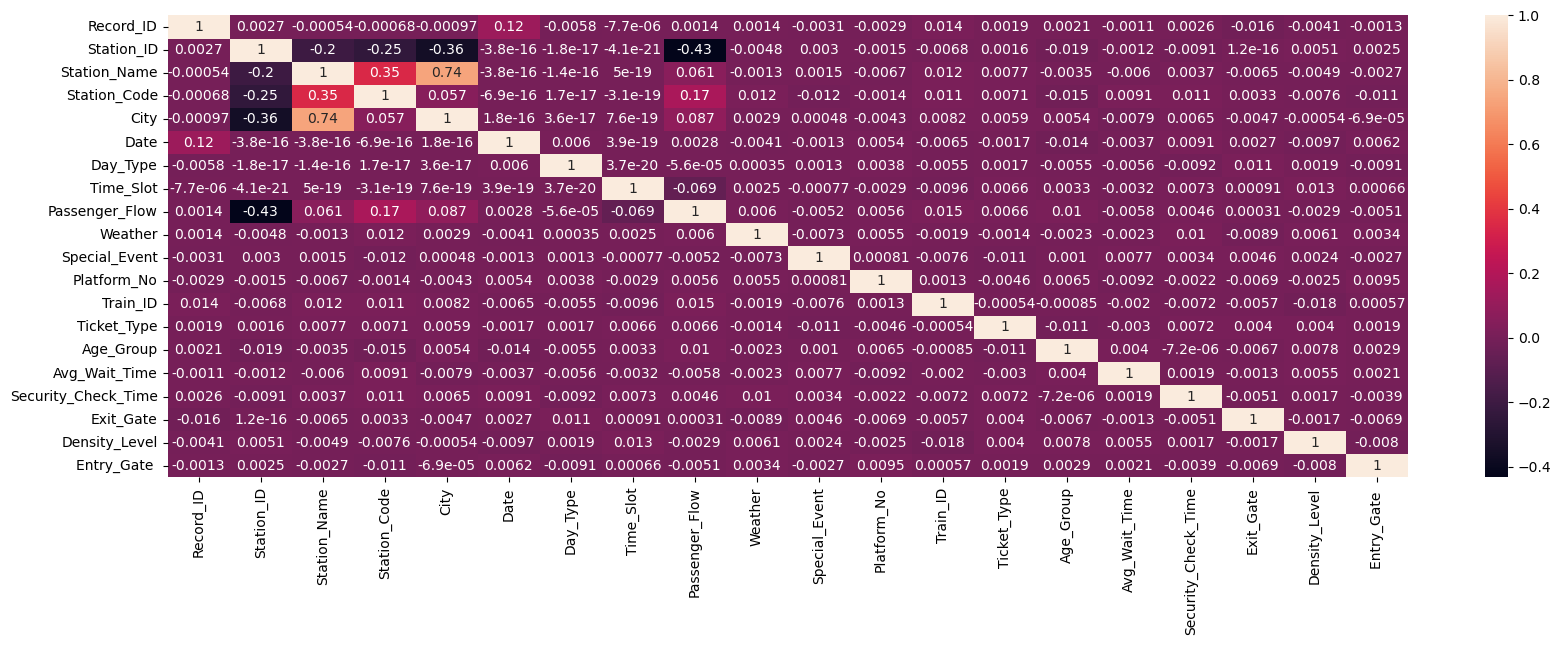

In [42]:
plt.figure(figsize=(20,6))
sns.heatmap(dataset_corr,annot=True)

<h3>Model building</h3>

<h3> 1..passenger flow prediction</h3>

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score



<h3>Feature Selection</h3>

In [47]:
X = dataset.drop(["Passenger_Flow", "Record_ID", "Station_ID", "Station_Code", "Train_ID","Entry_Gate" ,"Exit_Gate"], axis=1)

In [48]:
y = dataset["Passenger_Flow"]


<h3>data Validation</h3>

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<h3>Model Preparation</h3>

In [56]:
reg = RandomForestRegressor(n_estimators=200, random_state=42)

<h3>Model fitting</h3>

In [55]:
reg.fit(X_train, y_train)

,n_estimators,200
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


<h3> model evolution by prediction</h3>

In [52]:
y_pred = reg.predict(X_test)

In [54]:
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R²:", r2_score(y_test, y_pred)*100)


RMSE: 2680.6789852907723
R²: 81.08455302201402


<h3>2..Density_Level Prediction</h3>

In [59]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

<h3>Feature Selection</h3>

In [61]:
X = dataset.drop(["Density_Level", "Record_ID", "Station_ID", "Station_Code", "Train_ID","Entry_Gate" ,"Exit_Gate"], axis=1)
y = dataset["Density_Level"]

<h3>Data validation</h3>

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<h3>Model Preparation</h3>

In [63]:
clf = RandomForestClassifier(n_estimators=200, random_state=42)

<h3>Model fitting</h3>

In [64]:
clf.fit(X_train, y_train)

,n_estimators,200
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


<h3>model evolution by prediction</h3>

In [65]:
y_pred = clf.predict(X_test)

In [66]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.38410746812386154
              precision    recall  f1-score   support

           0       0.28      0.17      0.21      1329
           1       0.21      0.02      0.03       850
           2       0.41      0.80      0.54      1818
           3       0.00      0.00      0.00       395

    accuracy                           0.38      4392
   macro avg       0.23      0.25      0.20      4392
weighted avg       0.30      0.38      0.30      4392



C:\ProgramData\anaconda3\envs\mlenv\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\ProgramData\anaconda3\envs\mlenv\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\ProgramData\anaconda3\envs\mlenv\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape

<h2>Summary</h2>

### 📊 Visualization Summary

#### 1. Correlation Heatmap
- **Purpose**: To analyze relationships between different features.
- **Observation**:
  - Most correlations are very weak (close to 0).
  - `Station_Name` ↔ `City` shows strong **positive correlation** (~0.74).
  - `Passenger_Flow` ↔ `Station_ID` shows moderate **negative correlation** (~ -0.43).
  - Other correlations are very small (±0.01 to ±0.05), meaning negligible linear relationships.
- **Insight**:
  - Passenger flow does not have a strong *linear* dependency on most features.
  - Tree-based ML models (Random Forest, XGBoost) are better for capturing **non-linear patterns**.

---

---

#### 4. Scatter Plot (Wait Time vs Security Check Time)
- **Purpose**: To explore the relationship between waiting time and security check time.
- **Observation**:
  - High-density stations (e.g., Howrah, NDLS) show higher waiting times and longer security checks.
  - Low-density stations cluster in the lower-left (shorter wait and security time).
- **Insight**:
  - Station density directly impacts passenger waiting and security check durations.

---

#### 5. Pie/ Charts for Density Levels
- **Purpose**: To visualize distribution of station density levels (Low, Medium, High).
- **Observation**:
  - Certain stations dominate in "High" density.
  - Others are balanced between "Low" and "Medium".
- **Insight**:
  - Density distribution helps identify congested stations vs. less crowded ones.

---

#### 6. Feature Importance Plot 
- **Purpose**: To see which features impact Passenger Flow the most.
- **Method**: RandomForest Regressor trained and feature importance plotted.
- **Observation**:
  - Features like `Station_Name`, `Day_Type`, `Time_Slot`, and `Density_Level` contribute more.
  - Gate IDs and Ticket Type contribute less.
- **Insight**:
  - Even if heatmap correlations are weak, ML models reveal **non-linear feature importance**.


#### 🚉 Station_Name & City
- Major  stations (Howrah, NDLS, CST) record the highest passenger_flow.  
- Smaller city stations have lower flow, resulting in smoother waiting and security checks.  
- Strong link between Station_Name and City → bigger cities naturally handle heavier traffic.  

---

#### 📅 Day_Type & Time_Slot
- Weekdays (especially office hours) show the maximum passenger_flow.  
- Weekends are relatively balanced, but evening Time_Slots remain crowded.  
- Morning rush hours consistently have the highest Avg_Wait_Time and Security_Check_Time.  

---

#### 🌦 Weather & Special_Event
- Bad weather (rain, fog) slows passenger movement, increasing waiting times.  
- Special_Events cause sudden spikes in passenger_flow, even at normally low-density stations.  

---

#### 🎫 Ticket_Type & Age_Group
- Regular Ticket_Type (daily commuters) contributes the most to overall passenger_flow.  
- Tourist/occasional tickets increase flow mainly during weekends and events.  
- Young Age_Group (18–40) dominates travel freq_
